# Principles of Machine Learning WiSe23/24
## exercise 2
### getting used to the method of least squares
#### due: November 19, 2023

---
task 2.1

In [5]:
import numpy as np
data = np.loadtxt('whData.dat', dtype=np.object, comments='#', delimiter=None)
w = data[:,0].astype(float)
h = data[:,1].astype(float)

C:\Users\fryde\AppData\Local\Temp\ipykernel_13088\1415864366.py:2: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  data = np.loadtxt('whData.dat', dtype=np.object, comments='#', delimiter=None)


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

task 2.1.1

task 2.1.2

task 2.1.3

---
task 2.2.1

In [117]:
import numpy as np
import matplotlib.pyplot as plt

In [118]:
data = np.genfromtxt('myspace.csv', delimiter=',')
data = data[:, 1]
h = np.trim_zeros(data, 'f') #deleting front zeros
t = np.arange(1, len(h) + 1)

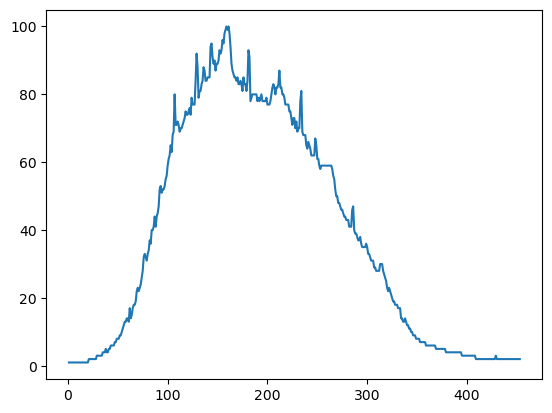

In [119]:
plt.plot(t,h)

task 2.2.2

In [201]:
def iterative_solve(alfa, beta, iterations, N, h):
    for _ in range(iterations):
        L_alfa = N/alfa - N*np.log(beta) + np.sum(np.log(h)) - np.sum(np.power(h/beta, alfa) * np.log(h/beta))
        L_beta = alfa/beta*(np.sum(np.power(h/beta, alfa)) - N)
        L2_alfa = -(N/np.power(alfa,2)) - np.sum(np.power(h/beta, alfa) * np.power(np.log(h/beta),2))
        L2_beta = (alfa/np.power(beta,2))*(N-(alfa+1)*np.sum(np.power(h/beta, alfa)))
        L2_alfa_beta = (1/beta)*np.sum(np.power(h/beta, alfa))+(alfa/beta)*np.sum(np.power(h/beta, alfa) * np.log(h/beta)) - N/beta

        alfabeta_arr = np.array([[alfa],
                                 [beta]])
        first_matrix = np.array([[L2_alfa, L2_alfa_beta],
                                 [L2_alfa_beta, L2_beta]])
        second_matrix = np.array([[-L_alfa],
                                  [-L_beta]])
        #ik it's a pretty lazy solution but eh, didn't want to calculate.
        alfabeta_arr = alfabeta_arr + np.matmul(np.linalg.inv(first_matrix), second_matrix)
        alfa = alfabeta_arr.flatten()[0]
        beta = alfabeta_arr.flatten()[1]
    return alfa, beta

In [218]:
# # Step 1: Estimate the PMF
# pmf = h / h.sum()

alfa, beta = iterative_solve(alfa=1, beta=1, iterations=20, N = len(h), h=h)

In [219]:
print(f"shape (alfa) = {alfa}")
print(f"scale (beta) = {beta}")

shape (alfa) = 0.8915448107254467
scale (beta) = 36.33360327796764


In [176]:
#fittinf the Weibull distribution
#weibull = alfa/beta*np.sign(t/beta)*np.power(np.abs(t/beta),alfa-1)*np.exp(-np.sign(t/beta)*np.power(np.abs(t/beta), alfa))
#Numpy does not seem to allow fractional powers of negative numbers, so np.sign(t/beta)*np.abs((t/beta)) is a work-around

In [215]:
def weib(x,alfa,beta, A = 1):
    """Weibull distribution

    Args:
        x (array): input array. In the assignment it's t
        beta (float): Scale parameter
        alfa (float): Shape parameter
        A (int, optional): Amplitude parameter. Defaults to 1.

    Returns:
        array: weibull distribution
    """
    return A*((alfa / beta) * (x / beta)**(alfa - 1) * np.exp(-((x / beta)**alfa)))

In [209]:
weibull = weib(t,alfa,beta)

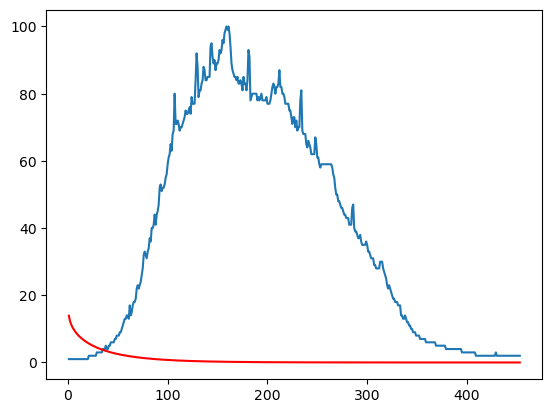

In [210]:
plt.plot(t,h)
plt.plot(t, weibull, color="red")
plt.show()

yea something is wrong idk what though.

---
task 2.3

In [193]:
from scipy.optimize import curve_fit

In [194]:
# Step 3: Fit the Weibull distribution to the data
initial_guess = [1, 1, 1000]  # Initial guess for Weibull parameters (shape, scale, amplitude)
params, covariance = curve_fit(weib, t, h, p0=initial_guess)

In [195]:
params

array([2.73096048e+00, 2.11024391e+02, 1.74593976e+04])

In [196]:
shape, scale, amplitude = params
weibull_distribution = weib(t, shape, scale, amplitude)

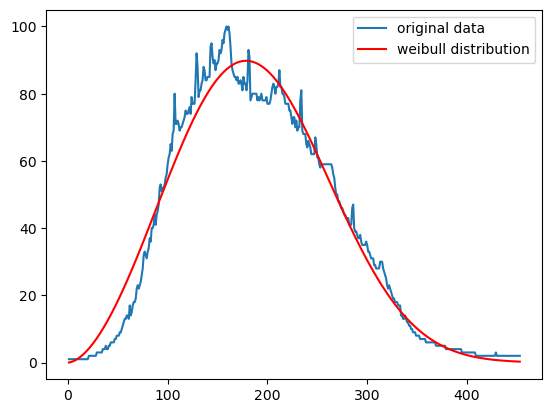

In [200]:
plt.plot(t, h, label = "original data") #original plot
plt.plot(t, weibull_distribution, color = "red", label = "weibull distribution")
plt.legend()

---
task 2.4

---
task 2.5